In [1]:
import geopandas as gpd

gdf = gpd.read_file('contours_1m.json')

In [2]:
gdf

,CONTOUR_TYPE,ELEVATION,geometry
0,Contour 1m,1,"LINESTRING (512673.384 5437500.000, 512673.280..."
1,Contour 1m,1,"LINESTRING (512590.381 5437500.000, 512590.368..."
2,Contour 1m,3,"LINESTRING (512828.158 5435903.488, 512828.177..."
3,Contour 1m,7,"LINESTRING (512947.170 5435808.390, 512947.430..."
4,Contour 1m,6,"LINESTRING (512960.340 5435834.750, 512960.450..."
...,...,...,...
98359,Contour 1m,2,"LINESTRING (509910.483 5451062.436, 509910.520..."
98360,Contour 1m,2,"LINESTRING (509500.000 5451088.409, 509500.198..."
98361,Contour 1m,6,"LINESTRING (509957.049 5450500.000, 509957.269..."
98362,Contour 1m,2,"LINESTRING (509934.769 5450938.033, 509934.760..."


In [2]:
gdf.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 126°W to 120°W and NAD83 by country
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
simp_gdf = gdf.simplify(0.2,preserve_topology = True)

AttributeError: 'NoneType' object has no attribute 'simplify'

In [4]:
import pyproj
import json
from shapely.geometry import Point, mapping , Polygon
from functools import partial
from shapely.ops import transform

point = Point(-22.758004,49.009615)

# Next create a circle basing on point and with buffer - in here 1000 (meters!):

local_azimuthal_projection = f"+proj=aeqd +R=6371000 +units=m +lat_0={point.y} +lon_0={point.x}"

wgs84_to_aeqd = partial(
    pyproj.transform,
    pyproj.Proj('+proj=longlat +datum=WGS84 +no_defs'),
    pyproj.Proj(local_azimuthal_projection),
)

aeqd_to_wgs84 = partial(
    pyproj.transform,
    pyproj.Proj(local_azimuthal_projection),
    pyproj.Proj('+proj=longlat +datum=WGS84 +no_defs'),
)

aeqd_to_27700 = partial(
    pyproj.transform,
    pyproj.Proj(local_azimuthal_projection),
    pyproj.Proj('+proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +ellps=airy +datum=OSGB36 +units=m +no_defs'),
)

point_transformed = transform(wgs84_to_aeqd, point)
loc_buffer = point_transformed.buffer(1000)


In [10]:
buffer_wgs84 = transform(aeqd_to_27700, loc_buffer)

In [13]:
clipped = gpd.clip(gdf,buffer_wgs84)

/home/ngaito/anaconda3/envs/geopack/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

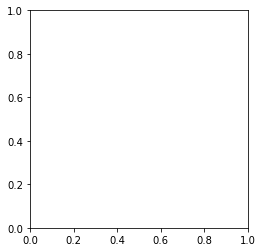

In [14]:
clipped.plot()

In [15]:
clipped

,CONTOUR_TYPE,ELEVATION,geometry


In [16]:
type(buffer_wgs84)

shapely.geometry.polygon.Polygon

In [17]:
buffer_wgs84.crs

AttributeError: 'Polygon' object has no attribute 'crs'

In [5]:
#create a polygopn bounding box 
#with lat and long from here https://www.findlatitudeandlongitude.com/

lat_point_list = [49.002238,49.016566,49.016651,49.002069]
lon_point_list = [-122.79034,-122.790305,-122.735267,-122.735523]
polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
# crs = {'init': 'epsg:26910'} old



polygon = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[polygon_geom])     


<AxesSubplot:>

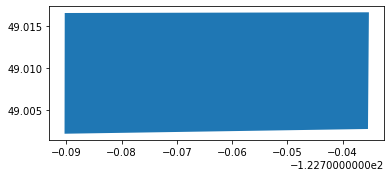

In [9]:
polygon.plot()

In [10]:
polygon2 = polygon.to_crs("EPSG:26910")

<AxesSubplot:>

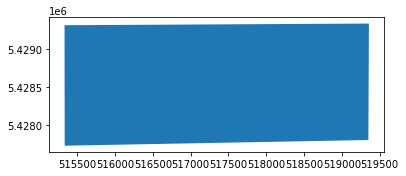

In [11]:
polygon2.plot()

In [12]:
gdf.plot()
polygon2.plot()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f938dc68700> (for post_execute):


KeyboardInterrupt: 

In [13]:
gdf.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 126°W to 120°W and NAD83 by country
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [60]:
dclean = gdf.dropna()

In [14]:

gclip = gpd.clip(gdf,polygon2)

<AxesSubplot:>

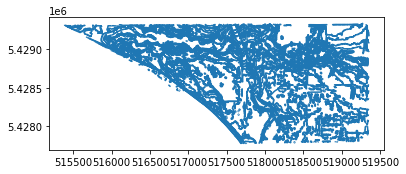

In [15]:
gclip.plot()

In [68]:
gclip.to_file("clipped_1m.shp")

/tmp/ipykernel_25683/3830372499.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gclip.to_file("clipped_1m.shp")
